######  <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#35c359">NLP: Text classification
<font color=darkblue>
    
######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#d40eea">Import Libraries
<font color=darkblue>

In [1]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns


import warnings 
warnings.filterwarnings('ignore')

######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#120eea">Load and display Dataset

In [2]:
df=pd.read_json("/home/jayanthikishore/Downloads/news_category_dataset.json", lines=True)
df

,short_description,headline,date,link,authors,category
0,She left her husband. He killed their children...,There Were 2 Mass Shootings In Texas Last Week...,2018-05-26,https://www.huffingtonpost.com/entry/texas-ama...,Melissa Jeltsen,CRIME
1,Of course it has a song.,Will Smith Joins Diplo And Nicky Jam For The 2...,2018-05-26,https://www.huffingtonpost.com/entry/will-smit...,Andy McDonald,ENTERTAINMENT
2,The actor and his longtime girlfriend Anna Ebe...,Hugh Grant Marries For The First Time At Age 57,2018-05-26,https://www.huffingtonpost.com/entry/hugh-gran...,Ron Dicker,ENTERTAINMENT
3,The actor gives Dems an ass-kicking for not fi...,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,2018-05-26,https://www.huffingtonpost.com/entry/jim-carre...,Ron Dicker,ENTERTAINMENT
4,"The ""Dietland"" actress said using the bags is ...",Julianna Margulies Uses Donald Trump Poop Bags...,2018-05-26,https://www.huffingtonpost.com/entry/julianna-...,Ron Dicker,ENTERTAINMENT
...,...,...,...,...,...,...
124984,,Why I Thought I'd Never Live To See 33,2014-04-18,https://www.huffingtonpost.com/entry/a-black-g...,,WOMEN
124985,I often hear people describe cooking for one a...,Five Tips For Cooking For One,2014-04-18,https://www.huffingtonpost.com/entry/five-tips...,"Food Riot, ContributorPlay with your food.",TASTE
124986,,Police Want your Home Video Surveillance Footage,2014-04-18,https://www.huffingtonpost.com/entry/police-wa...,"Robert Siciliano, ContributorPersonal Security...",CRIME
124987,,"Ouch, Natalie Morales",2014-04-18,https://www.huffingtonpost.com/entry/natalie-m...,Katherine Fung,MEDIA


In [3]:
df.columns

Index(['short_description', 'headline', 'date', 'link', 'authors', 'category'], dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124989 entries, 0 to 124988
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   short_description  124989 non-null  object        
 1   headline           124989 non-null  object        
 2   date               124989 non-null  datetime64[ns]
 3   link               124989 non-null  object        
 4   authors            124989 non-null  object        
 5   category           124989 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 5.7+ MB


######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#120eea">Number of categories

In [5]:
len(set(df['category'].values))

31

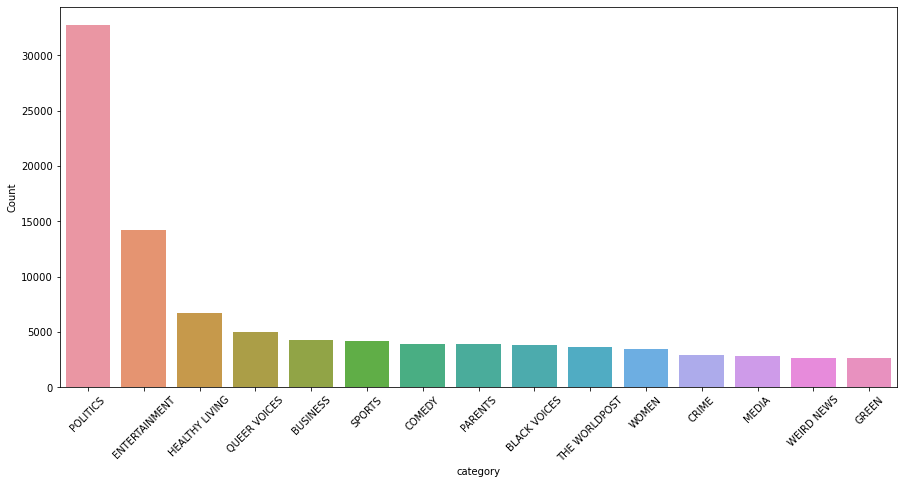

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
location = df['category']
location = pd.DataFrame(location)
location['Count'] = 1
location = location.groupby('category').sum().sort_values(by = 'Count', ascending = False).nlargest(15,['Count'])
location = location.reset_index()

plt.figure(figsize=(15,7))
sns.barplot(x = 'category',y = 'Count', data=location)
plt.xticks(rotation=45)

plt.show()

In [7]:
location

,category,Count
0,POLITICS,32739
1,ENTERTAINMENT,14257
2,HEALTHY LIVING,6694
3,QUEER VOICES,4995
4,BUSINESS,4254
5,SPORTS,4167
6,COMEDY,3971
7,PARENTS,3955
8,BLACK VOICES,3858
9,THE WORLDPOST,3664


In [8]:
time = df.date
time = pd.DataFrame(time)
Min = time.date.min()
Max = time.date.max()
print(f'The date range of the data is between {Min} and {Max}')
time

The date range of the data is between 2014-04-18 00:00:00 and 2018-05-26 00:00:00


,date
0,2018-05-26
1,2018-05-26
2,2018-05-26
3,2018-05-26
4,2018-05-26
...,...
124984,2014-04-18
124985,2014-04-18
124986,2014-04-18
124987,2014-04-18


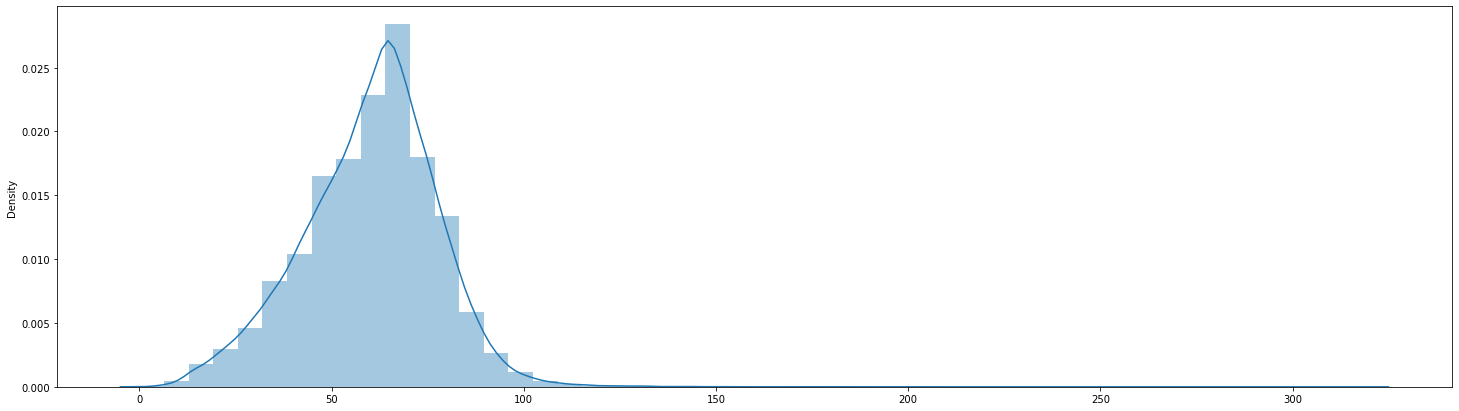

In [9]:
length_tweets = pd.DataFrame(df.headline)
length_measured = []
for i in length_tweets.headline:
 length_measured.append(len(i))

plt.figure(figsize=(25,7))
sns.distplot(length_measured)

In [10]:
df.category.unique()

array(['CRIME', 'ENTERTAINMENT', 'WORLD NEWS', 'IMPACT', 'POLITICS',
       'WEIRD NEWS', 'BLACK VOICES', 'WOMEN', 'COMEDY', 'QUEER VOICES',
       'SPORTS', 'BUSINESS', 'TRAVEL', 'MEDIA', 'TECH', 'RELIGION',
       'SCIENCE', 'LATINO VOICES', 'EDUCATION', 'COLLEGE', 'PARENTS',
       'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE', 'HEALTHY LIVING',
       'THE WORLDPOST', 'GOOD NEWS', 'WORLDPOST', 'FIFTY', 'ARTS'],
      dtype=object)

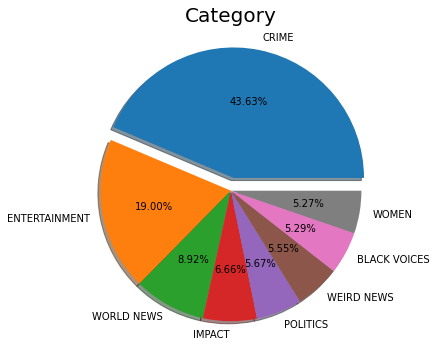

POLITICS          32739
ENTERTAINMENT     14257
HEALTHY LIVING     6694
QUEER VOICES       4995
BUSINESS           4254
SPORTS             4167
COMEDY             3971
PARENTS            3955
Name: category, dtype: int64

In [11]:
labls = ['CRIME', 'ENTERTAINMENT', 'WORLD NEWS', 'IMPACT', 'POLITICS','WEIRD NEWS', 'BLACK VOICES', 'WOMEN']
size1 = df['category'].value_counts()
size=size1[0:8]
explode = [0.1,0,0,0,0,0,0,0]

plt.rcParams['figure.figsize'] = (6, 6)
plt.pie(size, explode = explode, labels = labls, shadow = True, autopct = '%.2f%%')
plt.title('Category', fontsize = 20)
plt.axis('off')
# plt.legend()
plt.show()

size

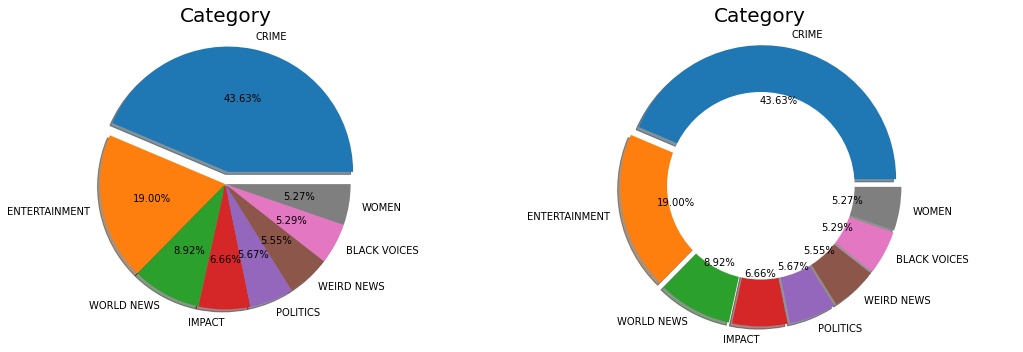

In [12]:
f, (ax1,ax2) = plt.subplots(ncols=2, figsize=(15, 5))

#first plot
labls = ['CRIME', 'ENTERTAINMENT', 'WORLD NEWS', 'IMPACT', 'POLITICS','WEIRD NEWS', 'BLACK VOICES', 'WOMEN']
size1 = df['category'].value_counts()
size=size1[0:8]
explode = [0.1,0,0,0,0,0,0,0]

ax1.pie(size, explode = explode, labels = labls, shadow = True, autopct = '%.2f%%')
ax1.set_title('Category', fontsize = 20)
plt.axis('off')

#second plot
explode1 = [0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05]

ax2.pie(size, explode = explode1, labels = labls, shadow = True, autopct = '%.2f%%')
ax2.set_title('Category', fontsize = 20)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre_circle)

#equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.tight_layout()
plt.show()

######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#120eea">Texts for Classification
    
- We create 3 different versions of classification 

In [16]:
import re

def tokenize_url(url:str):   
    url=url.replace("https://www.huffingtonpost.com/entry/","")
    url=re.sub("(\W|_)+"," ",url)
    return url

df['tokenized_url']=df['link'].apply(lambda x:tokenize_url(x))

#just the description
df['text_desc'] = df['short_description']

#description + headline
df['text_desc_headline'] = df['short_description'] + ' '+ df['headline']

#description + headline + tokenized url
df['text_desc_headline_url'] = df['short_description'] + ' '+ df['headline']+" " + df['tokenized_url']

df.head(3)

,short_description,headline,date,link,authors,category,tokenized_url,text_desc,text_desc_headline,text_desc_headline_url
0,She left her husband. He killed their children...,There Were 2 Mass Shootings In Texas Last Week...,2018-05-26,https://www.huffingtonpost.com/entry/texas-ama...,Melissa Jeltsen,CRIME,texas amanda painter mass shooting us 5b081ab4...,She left her husband. He killed their children...,She left her husband. He killed their children...,She left her husband. He killed their children...
1,Of course it has a song.,Will Smith Joins Diplo And Nicky Jam For The 2...,2018-05-26,https://www.huffingtonpost.com/entry/will-smit...,Andy McDonald,ENTERTAINMENT,will smith joins diplo and nicky jam for the o...,Of course it has a song.,Of course it has a song. Will Smith Joins Dipl...,Of course it has a song. Will Smith Joins Dipl...
2,The actor and his longtime girlfriend Anna Ebe...,Hugh Grant Marries For The First Time At Age 57,2018-05-26,https://www.huffingtonpost.com/entry/hugh-gran...,Ron Dicker,ENTERTAINMENT,hugh grant marries us 5b09212ce4b0568a880b9a8c,The actor and his longtime girlfriend Anna Ebe...,The actor and his longtime girlfriend Anna Ebe...,The actor and his longtime girlfriend Anna Ebe...


In [18]:
def _reciprocal_rank(true_labels: list, machine_preds: list):
    """Compute the reciprocal rank at cutoff k"""
    
    # add index to list only if machine predicted label exists in true labels
    tp_pos_list = [(idx + 1) for idx, r in enumerate(machine_preds) if r in true_labels]

    rr = 0
    if len(tp_pos_list) > 0:
        # for RR we need position of first correct item
        first_pos_list = tp_pos_list[0]
        
        # rr = 1/rank
        rr = 1 / float(first_pos_list)

    return rr

def compute_mrr_at_k(items:list):
    """Compute the MRR (average RR) at cutoff k"""
    rr_total = 0
    
    for item in items:   
        rr_at_k = _reciprocal_rank(item[0],item[1])
        rr_total = rr_total + rr_at_k
        mrr = rr_total / 1/float(len(items))

    return mrr

def collect_preds(Y_test,Y_preds):
    """Collect all predictions and ground truth"""
    
    pred_gold_list=[[[Y_test[idx]],pred] for idx,pred in enumerate(Y_preds)]
    return pred_gold_list
             
def compute_accuracy(eval_items:list):
    correct=0
    total=0
    
    for item in eval_items:
        true_pred=item[0]
        machine_pred=set(item[1])
        
        for cat in true_pred:
            if cat in machine_pred:
                correct+=1
                break
    
    
    accuracy=correct/float(len(eval_items))
    return accuracy

In [19]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

import numpy as np
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

def extract_features(df,field,training_data,testing_data,type="binary"):
    """Extract features using different methods"""
    
    logging.info("Extracting features and creating vocabulary...")
    
    if "binary" in type:
        
        # BINARY FEATURE REPRESENTATION
        cv= CountVectorizer(binary=True, max_df=0.95)
        cv.fit_transform(training_data[field].values)
        
        train_feature_set=cv.transform(training_data[field].values)
        test_feature_set=cv.transform(testing_data[field].values)
        
        return train_feature_set,test_feature_set,cv
  
    elif "counts" in type:
        
        # COUNT BASED FEATURE REPRESENTATION
        cv= CountVectorizer(binary=False, max_df=0.95)
        cv.fit_transform(training_data[field].values)
        
        train_feature_set=cv.transform(training_data[field].values)
        test_feature_set=cv.transform(testing_data[field].values)
        
        return train_feature_set,test_feature_set,cv
    
    else:    
        
        # TF-IDF BASED FEATURE REPRESENTATION
        tfidf_vectorizer=TfidfVectorizer(use_idf=True, max_df=0.95)
        tfidf_vectorizer.fit_transform(training_data[field].values)
        
        train_feature_set=tfidf_vectorizer.transform(training_data[field].values)
        test_feature_set=tfidf_vectorizer.transform(testing_data[field].values)
        
        return train_feature_set,test_feature_set,tfidf_vectorizer

def get_top_k_predictions(model,X_test,k):
    
    # get probabilities instead of predicted labels, since we want to collect top 3
    probs = model.predict_proba(X_test)

    # GET TOP K PREDICTIONS BY PROB - note these are just index
    best_n = np.argsort(probs, axis=1)[:,-k:]
    
    # GET CATEGORY OF PREDICTIONS
    preds=[[model.classes_[predicted_cat] for predicted_cat in prediction] for prediction in best_n]
    
    preds=[ item[::-1] for item in preds]
    
    return preds
   
    
def train_model(df,field="text_desc",feature_rep="binary",top_k=3):
    
    logging.info("Starting model training...")
    
    # GET A TRAIN TEST SPLIT (set seed for consistent results)
    training_data, testing_data = train_test_split(df,random_state = 2000,)

    # GET LABELS
    Y_train=training_data['category'].values
    Y_test=testing_data['category'].values
     
    # GET FEATURES
    X_train,X_test,feature_transformer=extract_features(df,field,training_data,testing_data,type=feature_rep)

    # INIT LOGISTIC REGRESSION CLASSIFIER
    logging.info("Training a Logistic Regression Model...")
    scikit_log_reg = LogisticRegression(verbose=1, solver='liblinear',random_state=0, C=5, penalty='l2',max_iter=1000)
    model=scikit_log_reg.fit(X_train,Y_train)

    # GET TOP K PREDICTIONS
    preds=get_top_k_predictions(model,X_test,top_k)
    
    # GET PREDICTED VALUES AND GROUND TRUTH INTO A LIST OF LISTS - for ease of evaluation
    eval_items=collect_preds(Y_test,preds)
    
    # GET EVALUATION NUMBERS ON TEST SET -- HOW DID WE DO?
    logging.info("Starting evaluation...")
    accuracy=compute_accuracy(eval_items)
    mrr_at_k=compute_mrr_at_k(eval_items)
    
    logging.info("Done training and evaluation.")
    
    return model,feature_transformer,accuracy,mrr_at_k


######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#120eea">Train a Single Model
    
- Model - 1 (binary features with description only)

In [20]:
field='text_desc'
feature_rep='binary'
top_k=3

model,transformer,accuracy,mrr_at_k=train_model(df,field=field,feature_rep=feature_rep,top_k=top_k)
print("\nAccuracy={0}; MRR={1}".format(accuracy,mrr_at_k))


2021-05-27 18:40:12,024 : INFO : Starting model training...
2021-05-27 18:40:12,166 : INFO : Extracting features and creating vocabulary...
2021-05-27 18:40:14,864 : INFO : Training a Logistic Regression Model...


[LibLinear]

2021-05-27 18:43:22,776 : INFO : Starting evaluation...
2021-05-27 18:43:22,840 : INFO : Done training and evaluation.



Accuracy=0.5981182795698925; MRR=0.4804787506400565


######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#120eea">Model - 2 (tfidf features with description only)

In [21]:
field='text_desc'
feature_rep='tfidf'
top_k=3

model,transformer,accuracy,mrr_at_k=train_model(df,field=field,feature_rep=feature_rep,top_k=top_k)
print("\nAccuracy={0}; MRR={1}".format(accuracy,mrr_at_k))


2021-05-27 18:46:08,048 : INFO : Starting model training...
2021-05-27 18:46:08,116 : INFO : Extracting features and creating vocabulary...
2021-05-27 18:46:10,935 : INFO : Training a Logistic Regression Model...


[LibLinear]

2021-05-27 18:47:00,655 : INFO : Starting evaluation...
2021-05-27 18:47:00,723 : INFO : Done training and evaluation.



Accuracy=0.6306963645673324; MRR=0.5108380269670775


######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#120eea">Model - 3 (tfidf features with description, headline, url)

In [22]:
field='text_desc_headline_url'
feature_rep='tfidf'
top_k=3

model,transformer,accuracy,mrr_at_k=train_model(df,field=field,feature_rep=feature_rep,top_k=top_k)
print("\nAccuracy={0}; MRR={1}".format(accuracy,mrr_at_k))

2021-05-27 18:47:00,766 : INFO : Starting model training...
2021-05-27 18:47:00,851 : INFO : Extracting features and creating vocabulary...
2021-05-27 18:47:06,762 : INFO : Training a Logistic Regression Model...


[LibLinear]

2021-05-27 18:48:20,766 : INFO : Starting evaluation...
2021-05-27 18:48:20,828 : INFO : Done training and evaluation.



Accuracy=0.8672875064004096; MRR=0.7511680747567727


######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#120eea">Check Predictions on Unseen Articles from CNN (not HuffPost our training data)

In [23]:
# https://www.cnn.com/2019/07/19/politics/george-nader-child-porn-sex-charges/index.html
test_features=transformer.transform(["George Aref Nader, who was a key witness in special counsel Robert Mueller's Russia investigation, faces new charges of transporting a minor with intent to engage in criminal sexual activity and child pornography"])
get_top_k_predictions(model,test_features,2)

[['POLITICS', 'CRIME']]

In [24]:
# https://www.cnn.com/2019/07/18/entertainment/khloe-kardashian-true-thompson-video-trnd/index.html
test_features=transformer.transform(["True Thompson makes an adorable cameo in Khloe Kardashian's new makeup tutorial video"])
model.predict(test_features)
get_top_k_predictions(model,test_features,2)


[['ENTERTAINMENT', 'STYLE']]

In [25]:
# https://www.cnn.com/2019/07/12/entertainment/heidi-klum-tom-kaulitz/
test_features=transformer.transform(["Heidi Klum is apparently the latest celeb to get married and not tell us"])
get_top_k_predictions(model,test_features,2)

[['ENTERTAINMENT', 'STYLE']]

In [26]:
# https://www.cnn.com/2019/07/19/investing/dow-stock-market-today/index.html
test_features=transformer.transform(["Stocks end lower as geopolitical fears rise. The Dow and US markets closed lower on Friday, as geopolitical worries overshadowed the hopes of interest rate cuts by the Federal Reserve."])
get_top_k_predictions(model,test_features,2)

[['BUSINESS', 'POLITICS']]

In [27]:
# https://www.cnn.com/2019/07/19/health/astronaut-exercise-iv-faint-scn/index.html
test_features=transformer.transform(["Exercise in space keeps astronauts from fainting when they return to Earth, study says. "])
get_top_k_predictions(model,test_features,2)

[['SCIENCE', 'HEALTHY LIVING']]

######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#120eea">Train Different Types of Models

In [28]:
feature_reps=['binary','counts','tfidf']
fields=['text_desc','text_desc_headline','text_desc_headline_url']
top_ks=[3]

results=[]
for field in fields:
    for feature_rep in feature_reps:
        for top_k in top_ks:
            model,transformer,acc,mrr_at_k=train_model(df,field=field,feature_rep=feature_rep,top_k=top_k)
            results.append([field,feature_rep,top_k,acc,mrr_at_k])

2021-05-27 18:55:41,990 : INFO : Starting model training...
2021-05-27 18:55:42,059 : INFO : Extracting features and creating vocabulary...
2021-05-27 18:55:44,954 : INFO : Training a Logistic Regression Model...


[LibLinear]

2021-05-27 18:58:19,526 : INFO : Starting evaluation...
2021-05-27 18:58:19,586 : INFO : Done training and evaluation.
2021-05-27 18:58:19,628 : INFO : Starting model training...
2021-05-27 18:58:19,689 : INFO : Extracting features and creating vocabulary...
2021-05-27 18:58:22,458 : INFO : Training a Logistic Regression Model...


[LibLinear]

2021-05-27 19:02:28,986 : INFO : Starting evaluation...
2021-05-27 19:02:29,046 : INFO : Done training and evaluation.
2021-05-27 19:02:29,079 : INFO : Starting model training...
2021-05-27 19:02:29,145 : INFO : Extracting features and creating vocabulary...
2021-05-27 19:02:32,020 : INFO : Training a Logistic Regression Model...


[LibLinear]

2021-05-27 19:03:17,266 : INFO : Starting evaluation...
2021-05-27 19:03:17,329 : INFO : Done training and evaluation.
2021-05-27 19:03:17,362 : INFO : Starting model training...
2021-05-27 19:03:17,429 : INFO : Extracting features and creating vocabulary...
2021-05-27 19:03:21,625 : INFO : Training a Logistic Regression Model...


[LibLinear]

2021-05-27 19:07:03,592 : INFO : Starting evaluation...
2021-05-27 19:07:03,654 : INFO : Done training and evaluation.
2021-05-27 19:07:03,689 : INFO : Starting model training...
2021-05-27 19:07:03,762 : INFO : Extracting features and creating vocabulary...
2021-05-27 19:07:08,367 : INFO : Training a Logistic Regression Model...


[LibLinear]

2021-05-27 19:12:43,203 : INFO : Starting evaluation...
2021-05-27 19:12:43,267 : INFO : Done training and evaluation.
2021-05-27 19:12:43,304 : INFO : Starting model training...
2021-05-27 19:12:43,370 : INFO : Extracting features and creating vocabulary...
2021-05-27 19:12:47,888 : INFO : Training a Logistic Regression Model...


[LibLinear]

2021-05-27 19:13:50,490 : INFO : Starting evaluation...
2021-05-27 19:13:50,556 : INFO : Done training and evaluation.
2021-05-27 19:13:50,606 : INFO : Starting model training...
2021-05-27 19:13:50,685 : INFO : Extracting features and creating vocabulary...
2021-05-27 19:13:56,175 : INFO : Training a Logistic Regression Model...


[LibLinear]

2021-05-27 19:17:25,941 : INFO : Starting evaluation...
2021-05-27 19:17:26,002 : INFO : Done training and evaluation.
2021-05-27 19:17:26,037 : INFO : Starting model training...
2021-05-27 19:17:26,101 : INFO : Extracting features and creating vocabulary...
2021-05-27 19:17:31,567 : INFO : Training a Logistic Regression Model...


[LibLinear]

2021-05-27 19:22:55,773 : INFO : Starting evaluation...
2021-05-27 19:22:55,836 : INFO : Done training and evaluation.
2021-05-27 19:22:55,878 : INFO : Starting model training...
2021-05-27 19:22:55,941 : INFO : Extracting features and creating vocabulary...
2021-05-27 19:23:01,302 : INFO : Training a Logistic Regression Model...


[LibLinear]

2021-05-27 19:24:06,098 : INFO : Starting evaluation...
2021-05-27 19:24:06,160 : INFO : Done training and evaluation.


- Results of Various Models

In [29]:
df_results=pd.DataFrame(results,columns=['text_fields','feature_representation','top_k','accuracy','mrr_at_k'])
df_results.sort_values(by=['text_fields','accuracy'],ascending=False)

,text_fields,feature_representation,top_k,accuracy,mrr_at_k
8,text_desc_headline_url,tfidf,3,0.867288,0.751168
6,text_desc_headline_url,binary,3,0.830101,0.715576
7,text_desc_headline_url,counts,3,0.829653,0.718126
5,text_desc_headline,tfidf,3,0.835893,0.717177
3,text_desc_headline,binary,3,0.794579,0.679158
4,text_desc_headline,counts,3,0.792147,0.677921
2,text_desc,tfidf,3,0.630696,0.510838
0,text_desc,binary,3,0.598118,0.480479
1,text_desc,counts,3,0.595654,0.478479


######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#120eea">Save Model for Future Use

In [32]:
import pickle

model_path="/home/jayanthikishore/Downloads/models/model.pkl"
transformer_path="/home/jayanthikishore/Downloads/models/transformer.pkl"

# we need to save both the transformer -> to encode a document and the model itself to make predictions based on the weight vectors 
pickle.dump(model,open(model_path, 'wb'))
pickle.dump(transformer,open(transformer_path,'wb'))

######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#120eea">Use Loaded Model

In [33]:
loaded_model = pickle.load(open(model_path, 'rb'))
loaded_transformer = pickle.load(open(transformer_path, 'rb'))


test_features=loaded_transformer.transform(["President Trump AND THE impeachment story !!!"])
get_top_k_predictions(loaded_model,test_features,2)


[['POLITICS', 'THE WORLDPOST']]